In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

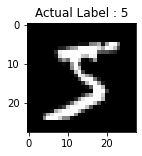

In [5]:
img_id = 0
plt.figure(figsize=(2,2))
plt.imshow(x_train[img_id], cmap='gray')
plt.title(f"Actual Label : {y_train[img_id]}")
plt.show()

In [6]:
# Converting the dataset (60000, 28, 28) into a flattend array of size (60000,784) 

x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))

In [7]:
x_train.shape

(60000, 784)

In [8]:
x_test.shape

(10000, 784)

In [9]:
# One hot encoding Target variables
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

### Build Neural Network

In [10]:
from keras.models import Sequential 
from keras.layers import Dense

In [11]:
model = Sequential()
model.add(Dense(392, input_dim = 784))
model.add(Dense(196, activation='relu'))
model.add(Dense(10, activation='softmax')) # Because multilclass classification problem

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 196)               77028     
                                                                 
 dense_2 (Dense)             (None, 10)                1970      
                                                                 
Total params: 386,718
Trainable params: 386,718
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adagrad',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [14]:
model.fit(x=x_train,
         y=y_train_ohe,
         batch_size=2000,
         epochs=30,
         validation_data=(x_test,y_test_ohe))

Epoch 1/30
30/30 [==============================] - 2s 35ms/step - loss: 24.5561 - accuracy: 0.6654 - val_loss: 7.9738 - val_accuracy: 0.8085
Epoch 2/30
30/30 [==============================] - 1s 31ms/step - loss: 6.6643 - accuracy: 0.8310 - val_loss: 5.6762 - val_accuracy: 0.8518
Epoch 3/30
30/30 [==============================] - 1s 30ms/step - loss: 4.9637 - accuracy: 0.8610 - val_loss: 4.6844 - val_accuracy: 0.8682
Epoch 4/30
30/30 [==============================] - 1s 28ms/step - loss: 4.1041 - accuracy: 0.8783 - val_loss: 4.1286 - val_accuracy: 0.8793
Epoch 5/30
30/30 [==============================] - 1s 28ms/step - loss: 3.5690 - accuracy: 0.8893 - val_loss: 3.7526 - val_accuracy: 0.8866
Epoch 6/30
30/30 [==============================] - 1s 29ms/step - loss: 3.1827 - accuracy: 0.8966 - val_loss: 3.4457 - val_accuracy: 0.8929
Epoch 7/30
30/30 [==============================] - 1s 29ms/step - loss: 2.8739 - accuracy: 0.9036 - val_loss: 3.2531 - val_accuracy: 0.8960
Epoch 8/30
3

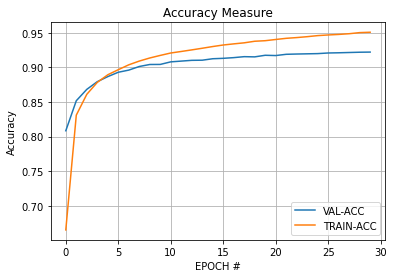

In [15]:
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['accuracy'])
plt.legend(['VAL-ACC', 'TRAIN-ACC'])
plt.title("Accuracy Measure")
plt.xlabel("EPOCH #")
plt.ylabel("Accuracy")
# plt.xticks(ticks = range(0,30), labels = range(1,31))
plt.grid()
plt.show()

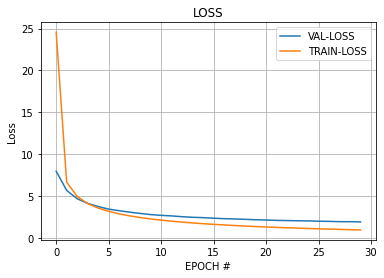

In [16]:
plt.plot(model.history.history['val_loss'])
plt.plot(model.history.history['loss'])
plt.legend(['VAL-LOSS', 'TRAIN-LOSS'])
plt.title("LOSS")
plt.xlabel("EPOCH #")
plt.ylabel("Loss")
plt.grid()
plt.show()

#### Predictions

In [17]:
import numpy as np

In [18]:
x_test[500].reshape(-1,784).shape

(1, 784)

In [19]:
pred = model.predict(x_test[500].reshape(-1,784))

In [20]:
pred

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
np.argmax(pred)

3

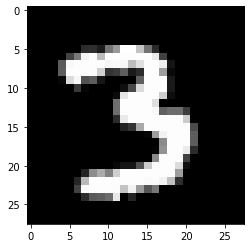

In [34]:
plt.imshow(x_test[500].reshape(28,28), cmap='gray')
plt.show()